In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [6]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(7661)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
for col in df.columns:
    print(df[col].value_counts())

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64
no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64
no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64
type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64
required_car_parking_space
0    20452
1      907
Name: count, dtype: int64
room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64
lead_time
0      951
1      715
2  

In [11]:
df.shape

(21359, 18)

In [12]:
data = df.copy()

In [13]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

In [14]:
categorical_cols.shape

(4,)

In [15]:
numerical_cols.shape

(14,)

In [16]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

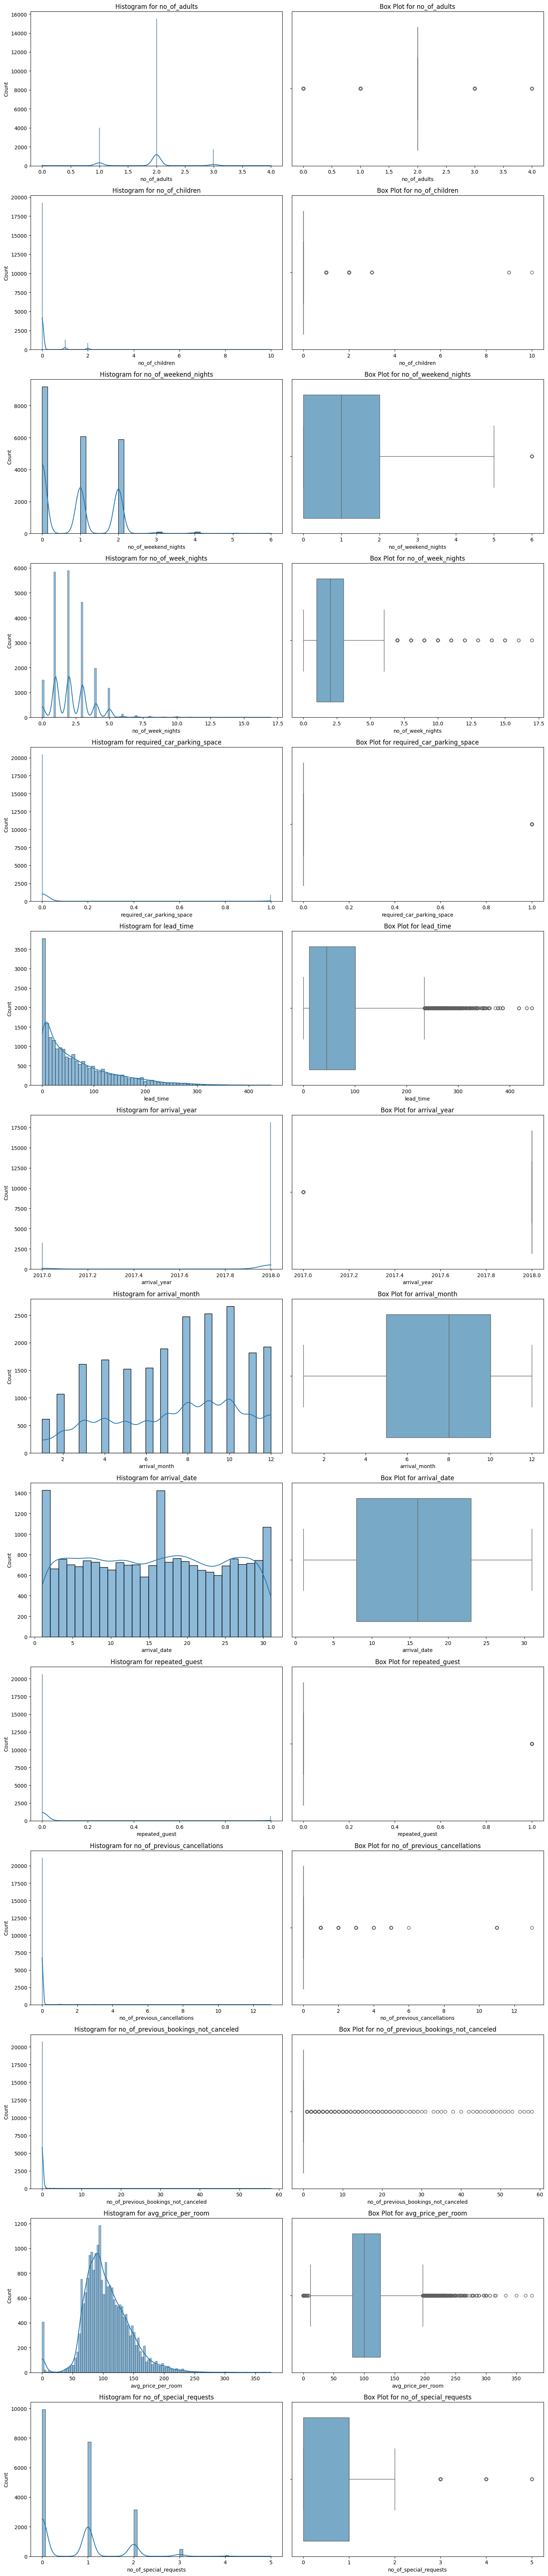

In [17]:
num_plot_dist(data, numerical_cols)

In [18]:
def cat_plot_dist(df, cat_features):
    for column in cat_features:
        df[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"{column} Distribution")
        plt.xlabel(column)
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()

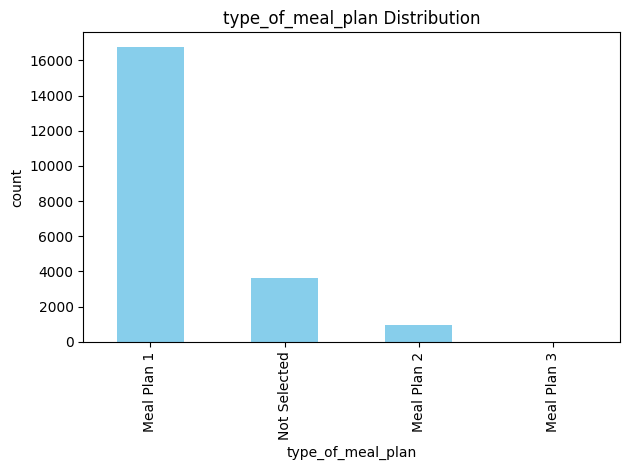

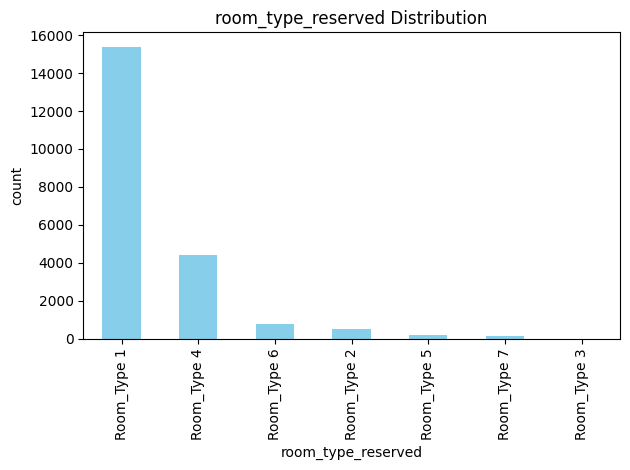

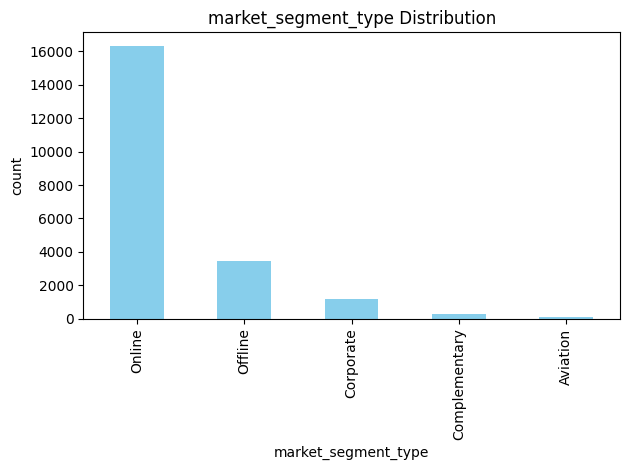

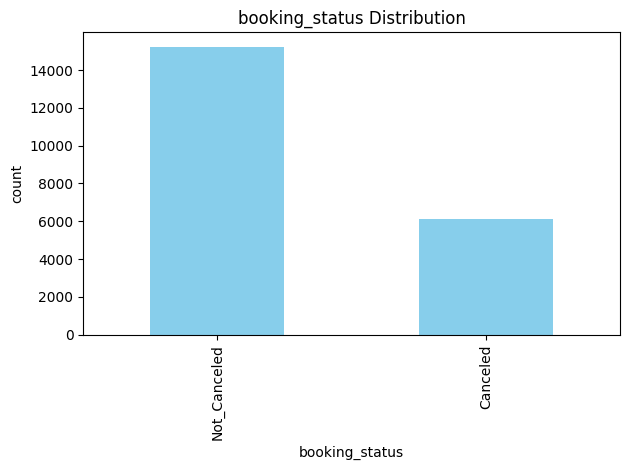

In [19]:
cat_plot_dist(data, categorical_cols)

In [20]:
def plot_bivariate_num(df, target, num_features):
    num_cols = len(num_features)
    num_rows = (num_cols + 1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, len(num_features)*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=data, palette="Blues")
        axes[i].set_title(f"{column} vs {target}")
    plt.tight_layout()
    plt.show()

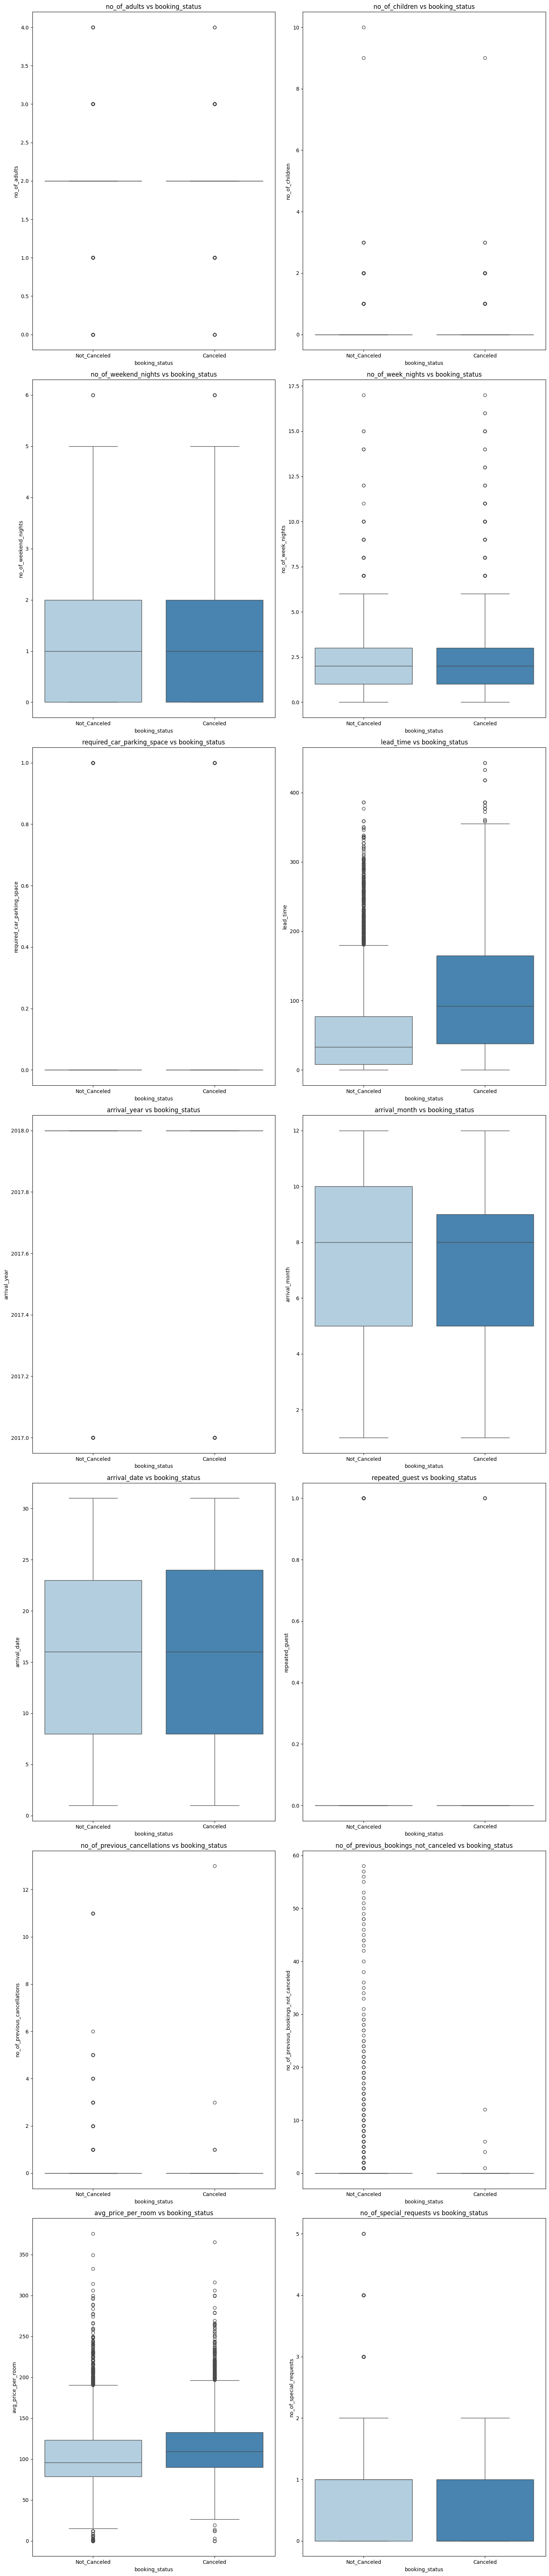

In [21]:
plot_bivariate_num(data, 'booking_status', numerical_cols)

In [22]:
def plot_bivariate_cat(df, target, cat_features):
    num_cols = len(cat_features)
    num_rows = (num_cols + 1)//2

    fig, axes = plt.subplots( num_rows, 2, figsize=(15, len(cat_features)*5))
    axes = axes.flatten()

    for i, column in enumerate(cat_features):
        sns.countplot(x=column, hue=target, ax=axes[i], data=df, palette='Set2')
        axes[i].set_title(f"{column} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()


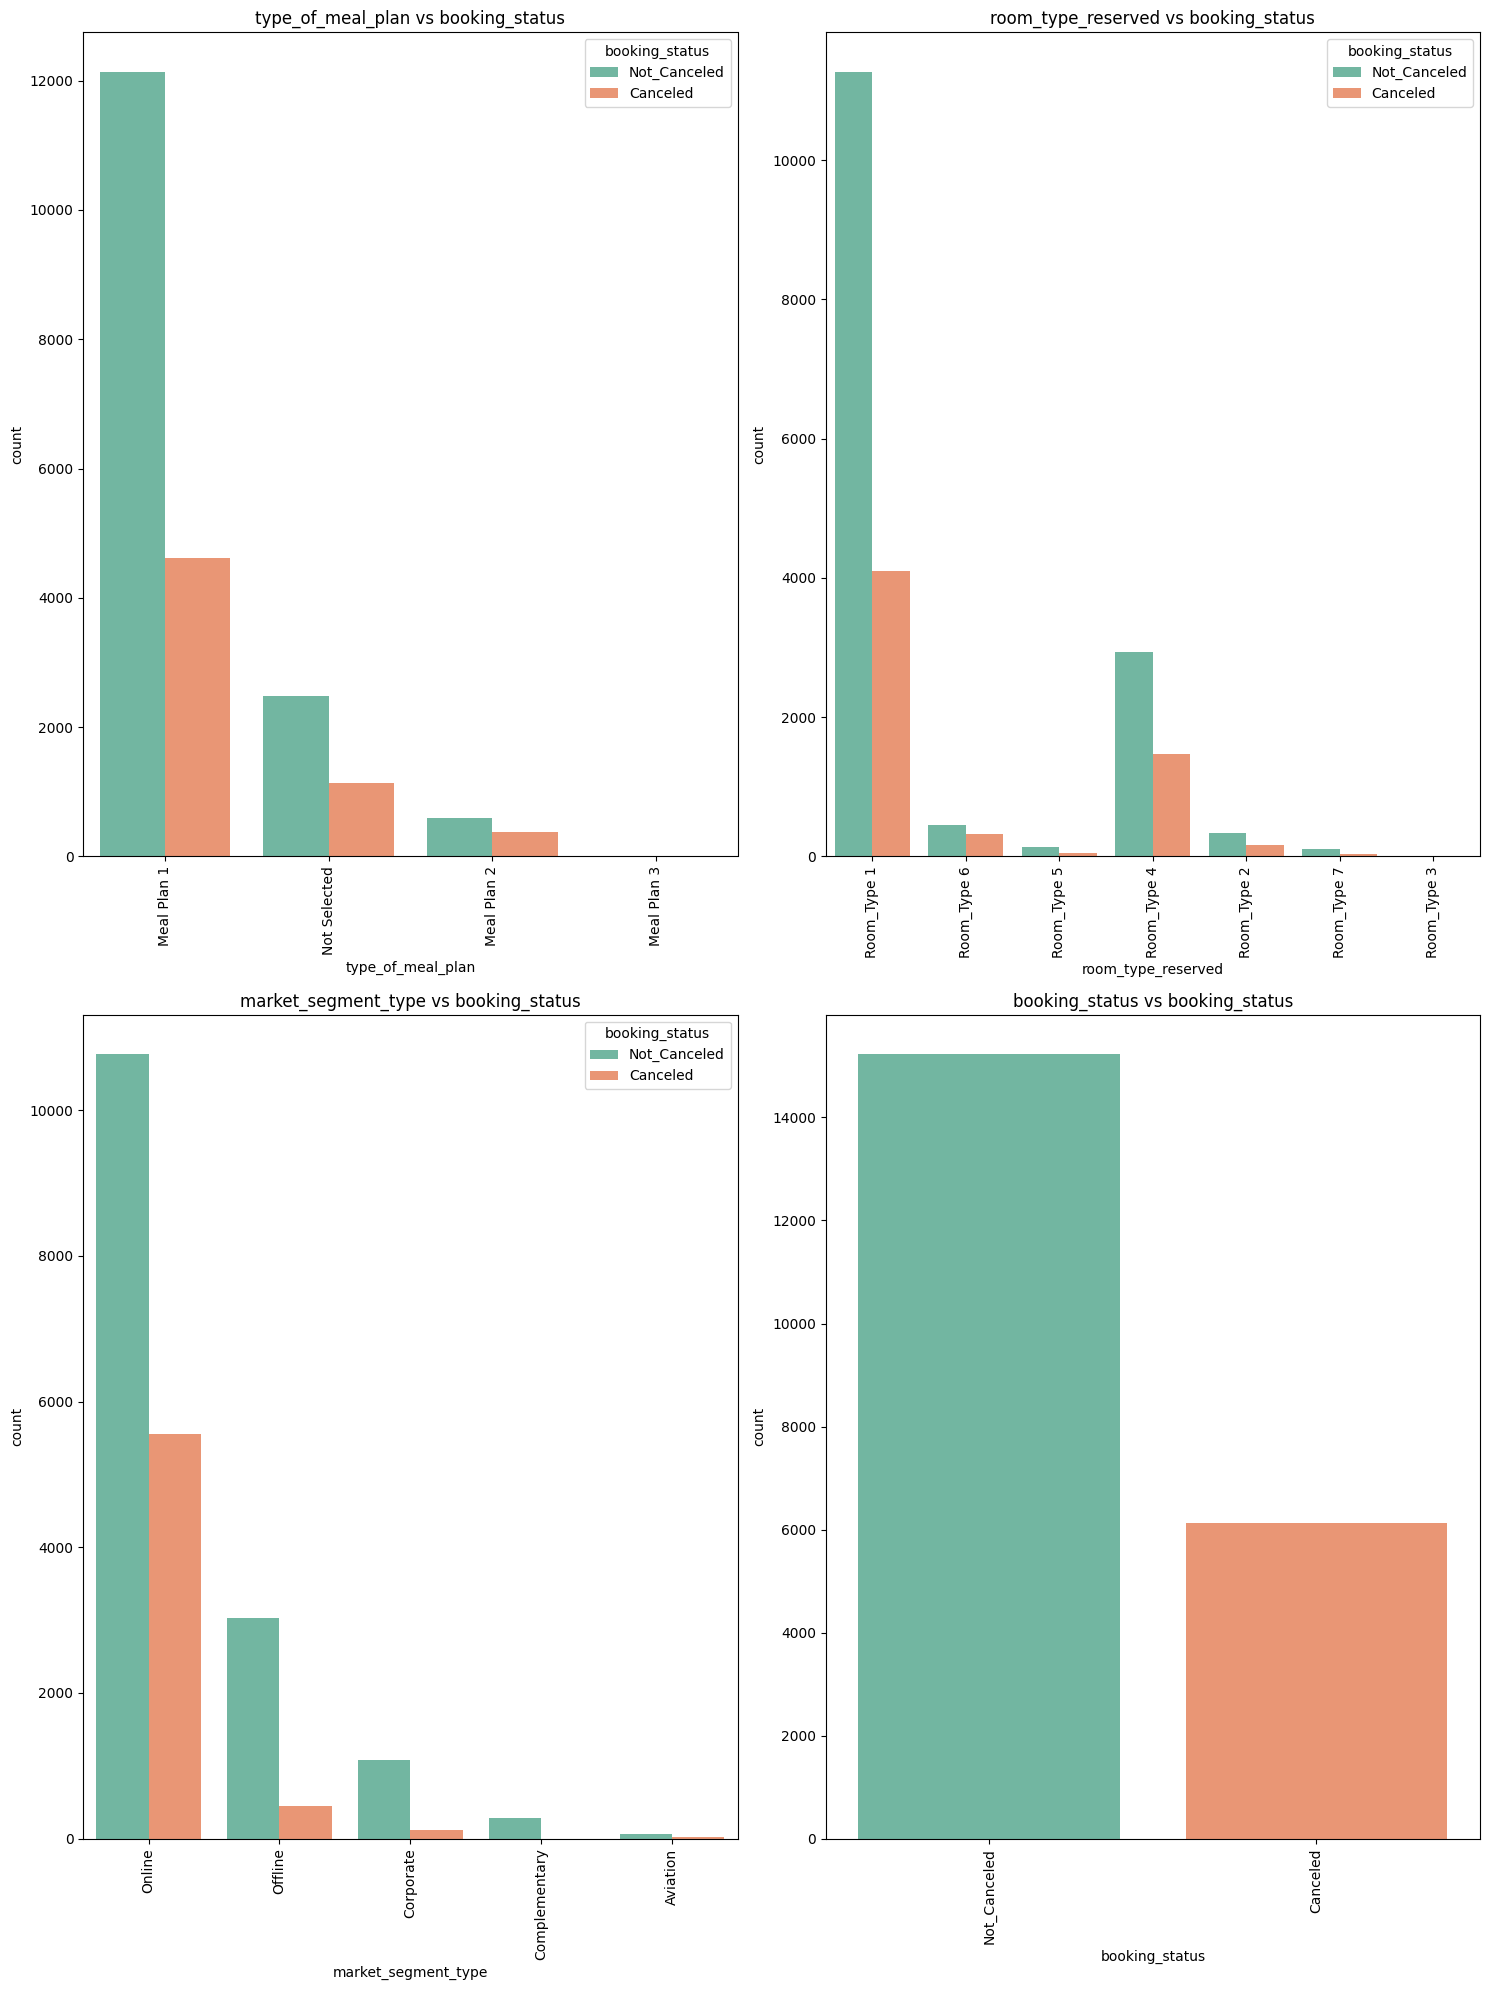

In [23]:
plot_bivariate_cat(data, 'booking_status', categorical_cols)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
Label_Encoder = LabelEncoder()

mappings = {}

for col in categorical_cols:
    df[col] = Label_Encoder.fit_transform(df[col])

    mappings[col] = {label : value for label, value in zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_))}
    

In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [27]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [28]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [30]:
X = add_constant(df)

In [31]:
X

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,1.0,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,1.0,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,1.0,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1.0,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,1.0,3,0,0,1,0,0,3,65,2018,6,21,4,0,0,0,132.30,0,0
29013,1.0,2,0,2,3,0,0,0,86,2018,6,17,4,0,0,0,126.90,1,1
29014,1.0,2,0,0,2,0,0,3,0,2018,10,12,4,0,0,0,139.50,1,1
29015,1.0,2,0,2,2,0,0,0,43,2017,12,26,3,0,0,0,55.00,2,1


In [32]:
X.values

array([[  1. ,   2. ,   1. , ..., 161. ,   0. ,   1. ],
       [  1. ,   2. ,   1. , ..., 121.5,   2. ,   1. ],
       [  1. ,   2. ,   0. , ...,  70. ,   0. ,   0. ],
       ...,
       [  1. ,   2. ,   0. , ..., 139.5,   1. ,   1. ],
       [  1. ,   2. ,   0. , ...,  55. ,   2. ,   1. ],
       [  1. ,   2. ,   0. , ..., 167.2,   0. ,   1. ]], shape=(21359, 19))

In [33]:
vif_data = pd.DataFrame()

vif_data["features"] = X.columns
vif_data["vif"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [34]:
vif_data

,features,vif
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [35]:
corr = df.corr()

In [36]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

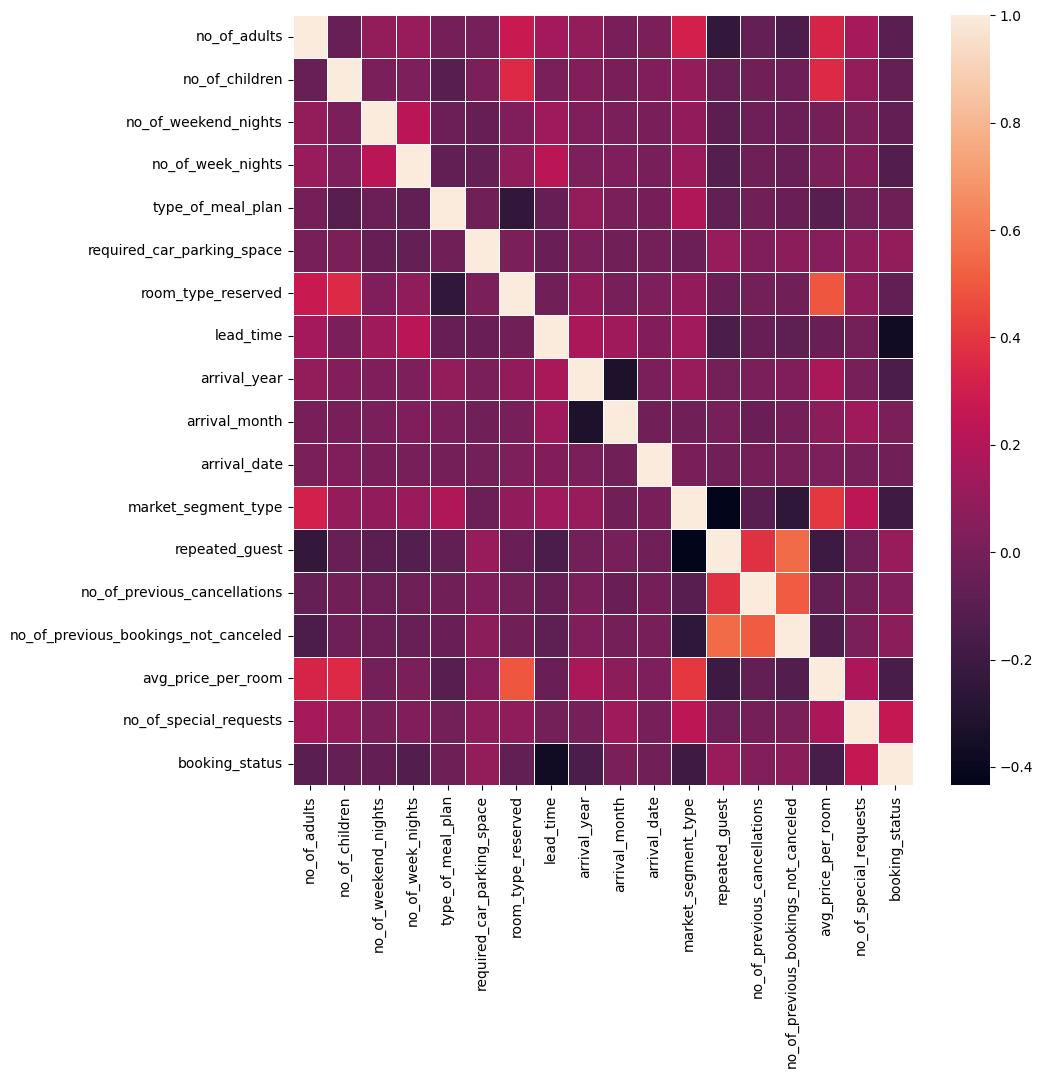

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5)

In [38]:
skewness = df.skew()

In [39]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [40]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [41]:
skewness = df.skew()

In [42]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [43]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()

In [46]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [47]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [48]:
rf.fit(X,y)

RandomForestClassifier()

In [49]:
feature_importance = rf.feature_importances_

In [50]:
feature_importance

array([1.91086080e-02, 9.12432776e-03, 3.67810987e-02, 5.60704377e-02,
       1.64064032e-02, 9.09361873e-03, 1.87429869e-02, 2.86549162e-01,
       1.87794956e-02, 7.86094175e-02, 9.71714562e-02, 6.12683463e-02,
       1.94415693e-03, 2.74900201e-04, 1.89537671e-03, 1.64034409e-01,
       1.24145799e-01])

In [51]:
feature_importance_df = pd.DataFrame({
    "features": X.columns,
    "value": feature_importance
})

In [52]:
feature_importance_df


,features,value
0,no_of_adults,0.019109
1,no_of_children,0.009124
2,no_of_weekend_nights,0.036781
3,no_of_week_nights,0.056070
4,type_of_meal_plan,0.016406
5,required_car_parking_space,0.009094
6,room_type_reserved,0.018743
7,lead_time,0.286549
8,arrival_year,0.018779
9,arrival_month,0.078609


In [54]:
sorted_feature_importance = feature_importance_df.sort_values(by="value", ascending=False)

In [55]:
sorted_feature_importance

,features,value
7,lead_time,0.286549
15,avg_price_per_room,0.164034
16,no_of_special_requests,0.124146
10,arrival_date,0.097171
9,arrival_month,0.078609
11,market_segment_type,0.061268
3,no_of_week_nights,0.056070
2,no_of_weekend_nights,0.036781
0,no_of_adults,0.019109
8,arrival_year,0.018779


In [63]:
top_10_features = sorted_feature_importance["features"].head(10).values

In [65]:
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [66]:
top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,no_of_adults,arrival_year,booking_status
0,26,161.00,0,17,10,4,1,2,2,2017,1
1,98,121.50,2,16,7,4,1,1,2,2018,1
2,433,70.00,0,8,9,3,3,0,2,2018,0
3,195,72.25,0,8,8,3,5,2,2,2018,1
4,188,130.00,0,15,6,3,2,0,1,2018,0


In [67]:
data = top_10_df.copy()

In [69]:
!pip install xgboost lightgbm

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 25.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [82]:
X = data.drop(columns="booking_status")
y = data["booking_status"]

In [83]:
y.shape

(21359,)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print(x_train.shape)
print(y_train.shape)


(17087, 10)
(17087,)


In [87]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [88]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [89]:
for model_name,classifier in classifiers.items():
    classifier.fit(x_train,y_train)

    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


In [81]:
print(x_train.shape)
print(y_train.shape)


(17087, 10)
(4272, 10)


In [90]:
analysis = pd.DataFrame(metrics)

In [91]:
analysis

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.853699,0.874291,0.924692,0.898785
1,LogisticRegression,0.790964,0.811282,0.915362,0.860185
2,Gradient Boosting,0.841526,0.861543,0.922692,0.891070
3,Suuport vector classifier,0.731039,0.730463,0.978007,0.836301
4,Decsion Tree,0.794007,0.856471,0.849050,0.852744
5,KNN,0.741105,0.778267,0.883039,0.827349
6,Naive Bayes,0.770599,0.851234,0.816061,0.833277
7,XGboost,0.849251,0.874484,0.917028,0.895250
8,Adaboost,0.804307,0.822077,0.920693,0.868595
9,LGBM,0.856039,0.878250,0.923026,0.900081


In [92]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [93]:
X = data.drop(columns="booking_status")
y = data["booking_status"]

In [94]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [95]:
rf = RandomForestClassifier(random_state=42)

In [96]:
params = {
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False]
}

In [97]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    scoring="accuracy",
    n_iter=50,
    random_state=42,
    cv=5
)


In [98]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002333B9835C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002333BE6C1A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002333BE6C080>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002333BE6CB30>},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.best_params_

In [101]:
best_df = random_search.best_estimator_

In [102]:
best_df

RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_split=4,
                       n_estimators=234, random_state=42)

In [103]:
y_pred = best_df.predict(X_test)

In [104]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [105]:
accuracy

0.851123595505618

In [106]:
precision

0.8745644599303136

In [107]:
recall

0.9200266577807398

In [108]:
f1

0.8967197141929197

In [110]:
import joblib

In [111]:
joblib.dump(best_df, "best_model.pkl")

['best_model.pkl']